## Taharat Hussain (A0141336)

## Dataset Description




### URL : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing</br>


### Input variables:
###  bank client data:
<br>1 - age (numeric)
<br>2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<br>3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
<br>8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
<br>21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Problem Description

Predict whether customer is going to subscribe to Term Deposit or Not.

### Applicable Algorithm

</br>All Supervised classification algorithm are applicable to this dataset as it is a labelled data and our goal is to predict binary outcome<br>

</br> Sklearn provides many classification algorithm API’s such as K-Means, Support Vector Machine, Logistic Regression, Decision Tree, Random Forest Neural Network, Naïve Bayes and many others.<br>

</br> For the purpose of this paper, I restricted to only three algorithms and they are Logistic regression, Support Vector Machine and Random Forest

#  ML Code

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
sns.set(font_scale=1.1)
pd.options.display.max_columns=200

## Load Data

In [2]:
# load banking market dataset
raw_data = pd.read_csv("bank-full.csv",sep=";")
raw_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
## Dropping the duration variable as mentioned in the Note of data description to make ML Model more realistic
raw_data.drop(['duration'],axis=1,inplace=True)

In [4]:
# check data shape
raw_data.shape

(45211, 16)

In [5]:
## rename target variable name to actual name 
raw_data.rename({'y':'term_deposit'},axis=1,inplace=True)

## check target variable distribution
raw_data['term_deposit'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: term_deposit, dtype: float64

## Split data into Train & Test

In [6]:
# traget variable is imbalance so doing straified sampling for train-test split
raw_train, raw_test = train_test_split(raw_data, test_size=0.20,stratify=raw_data['term_deposit'], random_state=42)

In [7]:
print(f"Train shape {raw_train.shape}, Test shpae {raw_test.shape}")

Train shape (36168, 16), Test shpae (9043, 16)


## Train Data information

In [8]:
# check for missing value and data types
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 24001 to 44229
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           36168 non-null  int64 
 1   job           36168 non-null  object
 2   marital       36168 non-null  object
 3   education     36168 non-null  object
 4   default       36168 non-null  object
 5   balance       36168 non-null  int64 
 6   housing       36168 non-null  object
 7   loan          36168 non-null  object
 8   contact       36168 non-null  object
 9   day           36168 non-null  int64 
 10  month         36168 non-null  object
 11  campaign      36168 non-null  int64 
 12  pdays         36168 non-null  int64 
 13  previous      36168 non-null  int64 
 14  poutcome      36168 non-null  object
 15  term_deposit  36168 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.7+ MB


## Descriptive stats

In [ ]:
# descriptive stats for numerical variable
raw_train.describe()

In [10]:
# descriptive stats for categorical variable
raw_train.describe(include=np.object)

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
count,36168,36168,36168,36168,36168,36168,36168,36168,36168,36168
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7830,21771,18561,35521,20182,30355,23465,11062,29589,31937


## Exploratory Data Analysis

In [ ]:
## Pair Plot for each numerical variables
sns.set_context("paper", font_scale=1.3)
sns_plot= sns.pairplot(raw_train,hue='term_deposit')


In [ ]:
# correlation plot
corr = raw_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu",annot_kws={'size': 15})

In [ ]:
# checking distribution of Term Deposit
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
raw_train['term_deposit'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

In [ ]:
# checking for extreme points
plt.figure(figsize=(15,5))
sns.boxplot(x='age', data=raw_train)

In [ ]:
# checking for extreme points
plt.figure(figsize=(15,5))
sns.boxplot(x='balance', data=raw_train)

In [ ]:
# checking for extreme points
plt.figure(figsize=(15,5))
sns.boxplot(x='campaign', data=raw_train)

In [ ]:
# checking for extreme points
plt.figure(figsize=(15,5))
sns.boxplot(x='pdays', data=raw_train)

In [ ]:
# checking for extreme points
plt.figure(figsize=(15,5))
sns.boxplot(x='previous', data=raw_train)

In [ ]:
# checking age relationship with term deposit
plt.figure(figsize=(15,5))
sns.histplot(data=raw_train, x="age", hue="term_deposit", multiple="dodge", shrink=.8, bins=8,)

In [ ]:
# checking balance relationship with term deposit
plt.figure(figsize=(15,5))
sns.histplot(data=raw_train, x="balance", hue="term_deposit", multiple="dodge", shrink=.8, bins=3)

In [ ]:
# checking campaign relationship with term deposit
plt.figure(figsize=(15,5))
sns.histplot(data=raw_train, x="campaign", hue="term_deposit", multiple="dodge", shrink=.8, bins=3)

In [ ]:
# checking pdays relationship with term deposit
plt.figure(figsize=(15,5))
sns.histplot(data=raw_train, x="pdays", hue="term_deposit", multiple="dodge", shrink=.8, bins=3)

In [ ]:
# checking previous relationship with term deposit
plt.figure(figsize=(15,5))
sns.histplot(data=raw_train, x="previous", hue="term_deposit", multiple="dodge", shrink=.8, bins=3)

In [ ]:
# checking job relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="job", hue="term_deposit", data=raw_train)

In [ ]:
# checking marital relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="marital", hue="term_deposit", data=raw_train)

In [ ]:
# checking marital relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="education", hue="term_deposit", data=raw_train)

In [ ]:
# checking marital relationship with term deposit
plt.figure(figsize=(18,5))
sns.catplot(x="housing", hue="term_deposit", col="loan",data=raw_train, kind="count")

In [ ]:
# checking contact relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="contact", hue="term_deposit", data=raw_train)

In [ ]:
# checking month relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="month", hue="term_deposit", data=raw_train)

In [ ]:
# checking poutcome relationship with term deposit
plt.figure(figsize=(15,5))
sns.countplot(y="poutcome", hue="term_deposit", data=raw_train)

## Data Cleaning

In [ ]:
# create copy of raw train to clean train data frame to store clean values
clean_train = raw_train.copy()

In [ ]:
class DataCleaner(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass #do nothing
    
    def fit(self, X, y=None):
        
        # computing mode for job variable to replace the unknown job with the mode of job
        self.job_mode = X['job'].mode()
        return self 
    
    def transform(self, X, y=None):
        
        # converting  negative balance to 0 balance and taking log transformation as data is highly skewed
        X.loc[X['balance']<0,'balance'] = 0
        X['balance'] = np.log(X['balance']+1)
        
        # replace unknown job code with mode of job
        X.loc[X['job']== 'unknown','job'] = X['job'].mode()
        
        # for poutcome combining other outcome to unknown outcome
        X.loc[X['poutcome']== 'other','poutcome'] = 'unknown'
        
        # converting pdays to binary column to indicate whether the last time bank was able to contact the customer or not
        # negative pdays means no contact and postive indiacate days passed since last contact
        X['pdays'] = (X['pdays'] < 0).astype(int)
        
        # convert default variable into binary variable
        X['default'] = (X['default'] == 'yes').astype(int)
        
        # convert housing variable into binary variable
        X['housing'] = (X['housing'] == 'yes').astype(int)  
        
        # convert loan variable into binary variable
        X['loan'] = (X['loan'] == 'yes').astype(int)     
        
        return X

In [ ]:
# creating data cleaner object
data_cleaner = DataCleaner()

# cleaning train data
clean_train = data_cleaner.fit_transform(clean_train)

In [ ]:
clean_train.head(3)

## Data Transformation

In [35]:
class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,cat_col,num_col,bin_col): 
        
        # define one hot encoder to encode categorical colum and drop the first category
        self.encoder = OneHotEncoder(drop='first')
        
        # define standard scaler to scale the numerical data
        self.scaler = StandardScaler()
        
        # stores all the numerical attribute
        self.num_col = num_col
        
        # stores all the categorical attribute
        self.cat_col = cat_col
        
        # stores all binary attribute
        self.bin_col = bin_col
        
        return 
    
    def fit(self, X, y=None):
        
        # fit one hot encoder on categorical attributes
        self.encoder.fit(X[self.cat_col])
        
        # fit standard scaler on numerical attributes
        self.scaler.fit(X[self.num_col])
    
        # rename the one hot encoder feature name with orignal feature name prefix
        self.enc_features =  self.encoder.get_feature_names()
        
        for idx, col in enumerate(self.cat_col):
            # replacing x in x0,x1,x2 with actual features name for better readability
            self.enc_features = [feature.replace(f"x{idx}",f"{col}") for feature in self.enc_features]
       
        return self 
    
    def transform(self, X, y=None):
        
        # transforming categorical columns
        enc_array = self.encoder.transform(X[self.cat_col])
        
        # converting encoder array into data frame
        enc_df = pd.DataFrame(enc_array.todense(),columns=self.enc_features,index=X.index)
        
        # transforming numerical columns
        scaler_array = self.scaler.transform(X[self.num_col])
        
        # converting scaler array into scaler dataframe
        scaler_df = pd.DataFrame(scaler_array,columns=self.num_col,index=X.index)
        
        # binary col data frame
        binary_df = X[self.bin_col]
        
        # concatenating scaler df, binary df and encoder df to create final transformed data frame
        transform_df = pd.concat([scaler_df,binary_df,enc_df],axis=1,ignore_index=False,sort=False)

        return transform_df

In [36]:
# define numerical, categorical and binary column list
num_col = ['age','balance','day','campaign','previous']
cat_col = ['job','marital','education','contact','month','poutcome']
bin_col = ['default','housing','loan','pdays']

# create data transformation object to transform categorical and numerical column
data_transform = DataTransformer(cat_col,num_col,bin_col)

# transform training data
x_train = data_transform.fit_transform(clean_train)

x_train.head(3)

,age,balance,day,campaign,previous,default,housing,loan,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
24001,-0.460434,0.516310,1.582124,-0.246104,-0.241509,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43409,-1.589641,1.078836,-1.298384,0.398202,2.664584,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20669,0.292371,0.064437,-0.458236,0.398202,-0.241509,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# converting term deposit to binary variable 
y_train = (clean_train['term_deposit'] == 'yes').astype(int)
y_train.head(3)

24001    0
43409    1
20669    1
Name: term_deposit, dtype: int32

## Prepare Test Data

In [38]:
# copy raw test data to clean_test dataframe to store clean values
clean_test = raw_test.copy()

# cleaning test data
clean_train = data_cleaner.transform(clean_test)

# transform test data
x_test = data_transform.fit_transform(clean_test)

In [39]:
x_test.head(3)

,age,balance,day,campaign,previous,default,housing,loan,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown
1392,-0.104787,0.418666,-0.936754,-0.248415,-0.315367,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7518,0.273153,0.230517,1.718905,-0.248415,-0.315367,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12007,-0.955152,0.209106,0.511787,0.727721,-0.315367,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# converting term deposit to binary variable 
y_test = (clean_test['term_deposit'] == 'yes').astype(int)
y_test.head(3)

1392     0
7518     0
12007    0
Name: term_deposit, dtype: int32

## ML Classification Model Fitting

### Model 1 - Logistic Regression

In [41]:
# define model
logistic_clf = LogisticRegression(random_state=10,class_weight='balanced')

# fit model on training data
logistic_clf.fit(x_train,y_train)

# check prediction performance on training data
print(classification_report(y_train, logistic_clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     31937
           1       0.27      0.64      0.38      4231

    accuracy                           0.75     36168
   macro avg       0.60      0.70      0.61     36168
weighted avg       0.86      0.75      0.79     36168



In [42]:
# check prediction performance on test data
print(classification_report(y_test, logistic_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7985
           1       0.27      0.65      0.38      1058

    accuracy                           0.75      9043
   macro avg       0.61      0.71      0.61      9043
weighted avg       0.86      0.75      0.79      9043



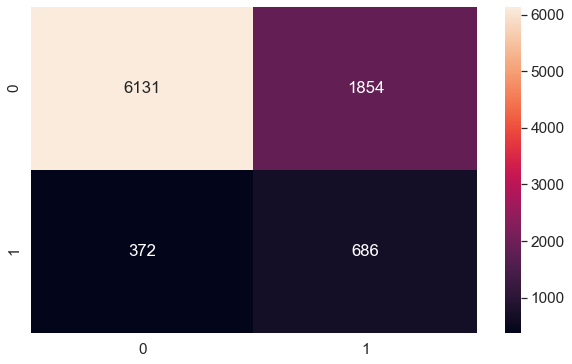

In [43]:
# confusion matrxi on test data
cf_matrix = confusion_matrix(y_test, logistic_clf.predict(x_test))

# plot confusion matrix
plt.figure(figsize=(10,6))
sns. set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True,fmt='g')

## Model 2 SVM Classifier

In [44]:
# define svm classifier with polynomial kernel
svm_clf = SVC(kernel='poly',class_weight='balanced',degree=2)

# fit model on training data
svm_clf.fit(x_train,y_train)

# check prediction performance on training data
print(classification_report(y_train, svm_clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     31937
           1       0.36      0.61      0.45      4231

    accuracy                           0.83     36168
   macro avg       0.65      0.73      0.68     36168
weighted avg       0.88      0.83      0.85     36168



In [45]:
# check prediction performance on test data
print(classification_report(y_test, svm_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7985
           1       0.36      0.60      0.45      1058

    accuracy                           0.83      9043
   macro avg       0.65      0.73      0.67      9043
weighted avg       0.87      0.83      0.85      9043



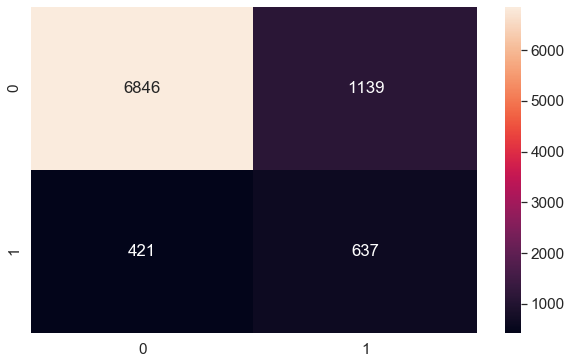

In [46]:
# confusion matrxi on test data
cf_matrix = confusion_matrix(y_test, svm_clf.predict(x_test))

# plot confusion matrix
plt.figure(figsize=(10,6))
sns. set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True,fmt='g')

### Model 3 Random Forest

In [47]:
# define random forest classifier
forest_clf = RandomForestClassifier(max_depth=7,n_estimators=200, random_state=12,class_weight='balanced')

# fit model on training data
forest_clf.fit(x_train,y_train)

# check prediction performance on training data
print(classification_report(y_train, forest_clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     31937
           1       0.33      0.63      0.43      4231

    accuracy                           0.81     36168
   macro avg       0.64      0.73      0.66     36168
weighted avg       0.87      0.81      0.83     36168



In [48]:
# check prediction performance on test data
print(classification_report(y_test, forest_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      7985
           1       0.31      0.61      0.41      1058

    accuracy                           0.80      9043
   macro avg       0.63      0.72      0.64      9043
weighted avg       0.87      0.80      0.82      9043



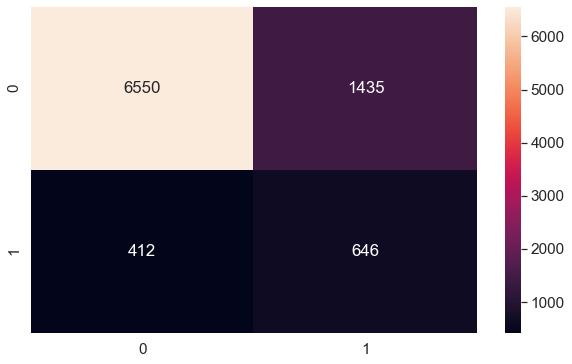

In [49]:
# confusion matrxi on test data
cf_matrix = confusion_matrix(y_test, forest_clf.predict(x_test))

# plot confusion matrix
plt.figure(figsize=(10,6))
sns. set(font_scale=1.4)
sns.heatmap(cf_matrix, annot=True,fmt='g')

# Conlcusion
##### Out of the three machine learning algorithms trained, Support vector machine with polynomial kernel is best algorithm which is relatively better than the other two model in correctly predicting the positive class